In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Combined Dataset

In [125]:
df = pd.read_csv('combined_cases_final.csv')
df.head()

,state,year,disease,cases,deaths
0,Al Jazirah,2018,Acute Tonsillitis,16,0
1,Al Qadarif,2018,Acute Tonsillitis,27,0
2,Blue Nile,2018,Acute Tonsillitis,18,0
3,Central Darfur,2018,Acute Tonsillitis,2,0
4,East Darfur,2018,Acute Tonsillitis,2,0


In [126]:
df['state'].unique()

array(['Al Jazirah', 'Al Qadarif', 'Blue Nile', 'Central Darfur',
       'East Darfur', 'Kassala', 'Khartoum', 'North Darfur',
       'North Kordofan', 'Northern', 'Red Sea', 'River Nile', 'Sennar',
       'South Darfur', 'South Kordofan', 'West Darfur', 'West Kordofan',
       'White Nile', 'Aj Jazirah'], dtype=object)

Here, Al Jazirah is mistakenly typed as Aj Jazirah 

In [128]:
df[df['state'] == 'Aj Jazirah']

,state,year,disease,cases,deaths
198,Aj Jazirah,2019,Dengue Cumulative,1,0
216,Aj Jazirah,2019,Chikugunya Cumulative,1,0
234,Aj Jazirah,2019,Rift Valley Fever Cumulative,1,0
252,Aj Jazirah,2019,Diphtheria Cumulative,2,0
270,Aj Jazirah,2019,Cholera Cumulative,9,0


In [129]:
df['state'] = df['state'].replace('Aj Jazirah', 'Al Jazirah')

In [130]:
df['state'].unique()

array(['Al Jazirah', 'Al Qadarif', 'Blue Nile', 'Central Darfur',
       'East Darfur', 'Kassala', 'Khartoum', 'North Darfur',
       'North Kordofan', 'Northern', 'Red Sea', 'River Nile', 'Sennar',
       'South Darfur', 'South Kordofan', 'West Darfur', 'West Kordofan',
       'White Nile'], dtype=object)

In [131]:
df.describe()

,year,cases,deaths
count,360.000000,360.000000,360.000000
mean,2019.450000,211.719444,4.011111
std,2.315685,1109.607078,27.400972
min,2018.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000
50%,2018.000000,11.000000,0.000000
75%,2019.000000,41.250000,0.000000
max,2024.000000,11627.000000,317.000000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   state    360 non-null    object
 1   year     360 non-null    int64 
 2   disease  360 non-null    object
 3   cases    360 non-null    int64 
 4   deaths   360 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.2+ KB


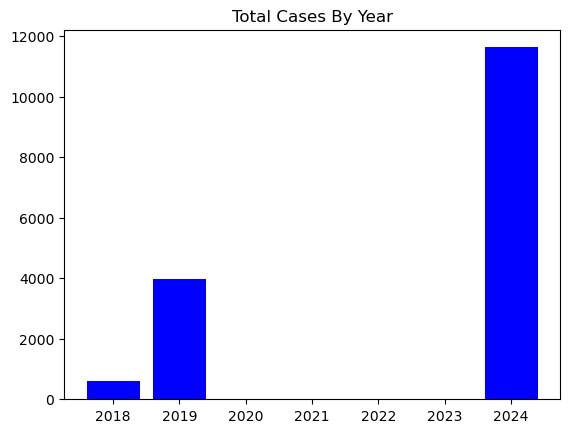

In [133]:
plt.bar(df['year'], df['cases'], color = 'blue')
plt.title('Total Cases By Year')
plt.show()

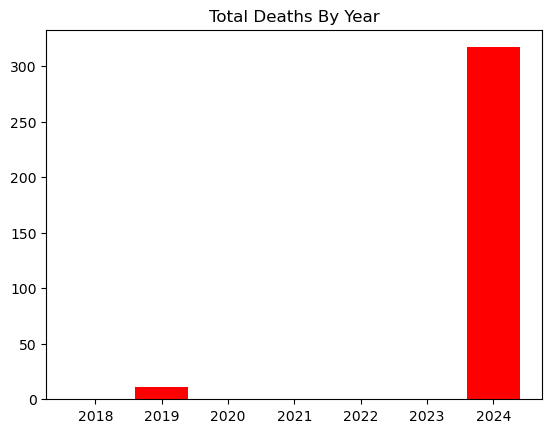

In [134]:
plt.bar(df['year'], df['deaths'], color='red')
plt.title('Total Deaths By Year')
plt.show()

Actually, original dataset on 2018 had no death counts available, so can't relate, so just comparing 2019 and 2024 shows the significant increase in death counts.

## Total Cases By Disease

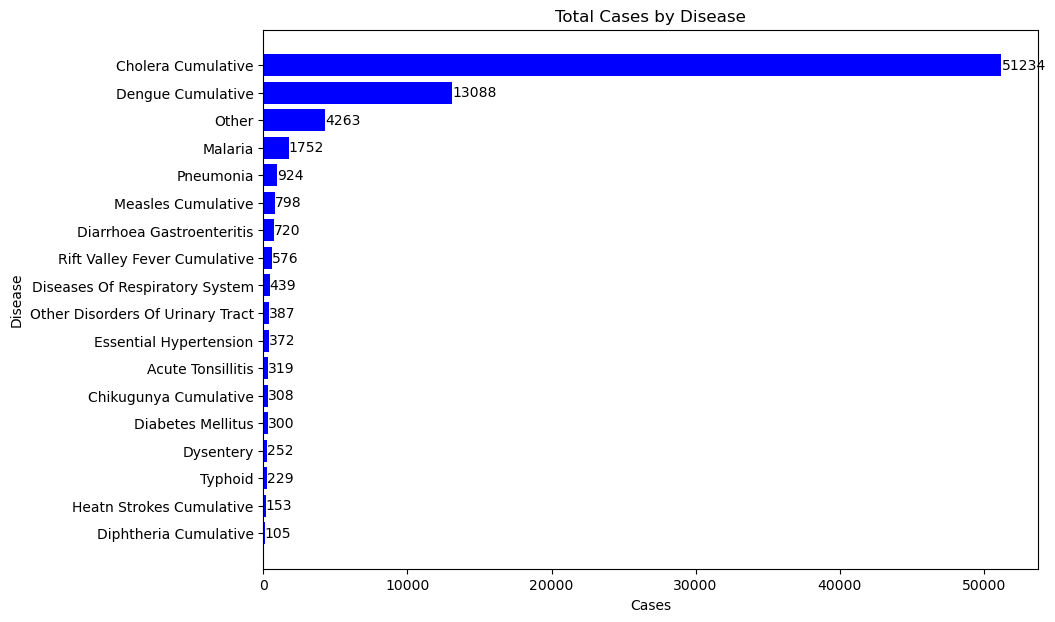

In [137]:
disease_data = df.groupby('disease')['cases'].sum().reset_index()
disease_data_sorted = disease_data.sort_values(by='cases', ascending=True)

plt.figure(figsize=(10, 7))
bars = plt.barh(disease_data_sorted['disease'], disease_data_sorted['cases'], color='blue')

for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center', ha='left', color='black')

plt.xlabel('Cases')
plt.ylabel('Disease')
plt.title('Total Cases by Disease')
plt.show()

The most cases are of Cholera

## Total Deaths By Disease

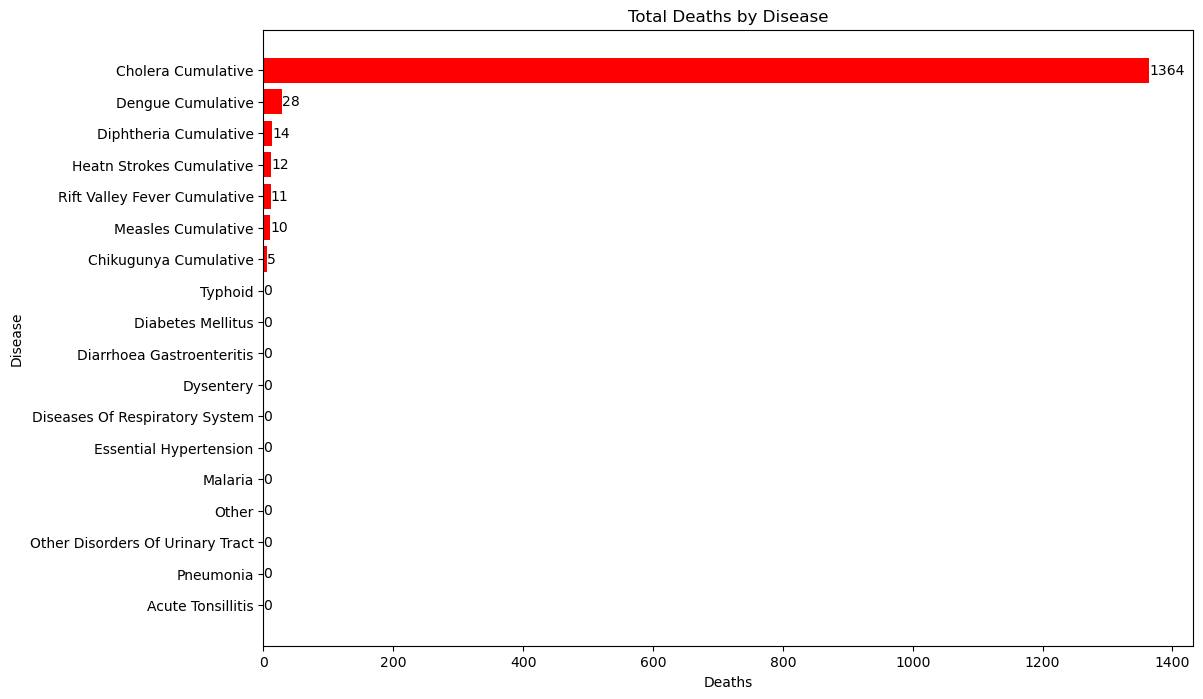

In [140]:
disease_data = df.groupby('disease')['deaths'].sum().reset_index()
disease_data_sorted = disease_data.sort_values(by='deaths', ascending=True)

plt.figure(figsize=(12, 8))
bars = plt.barh(disease_data_sorted['disease'], disease_data_sorted['deaths'], color='red')

for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center', ha='left', color='black')

plt.xlabel('Deaths')
plt.ylabel('Disease')
plt.title('Total Deaths by Disease')
plt.show()

While comparing the bar chart of the number of cases and diseases, there seems a positive correlation among no. of cases and no. of deaths.

## Correlation among Cases and Deaths

In [143]:
correlation = df['cases'].corr(df['deaths'])
correlation 

0.84325994399432

## Observing the Death Rate Ratio (Death Rate Per Case)

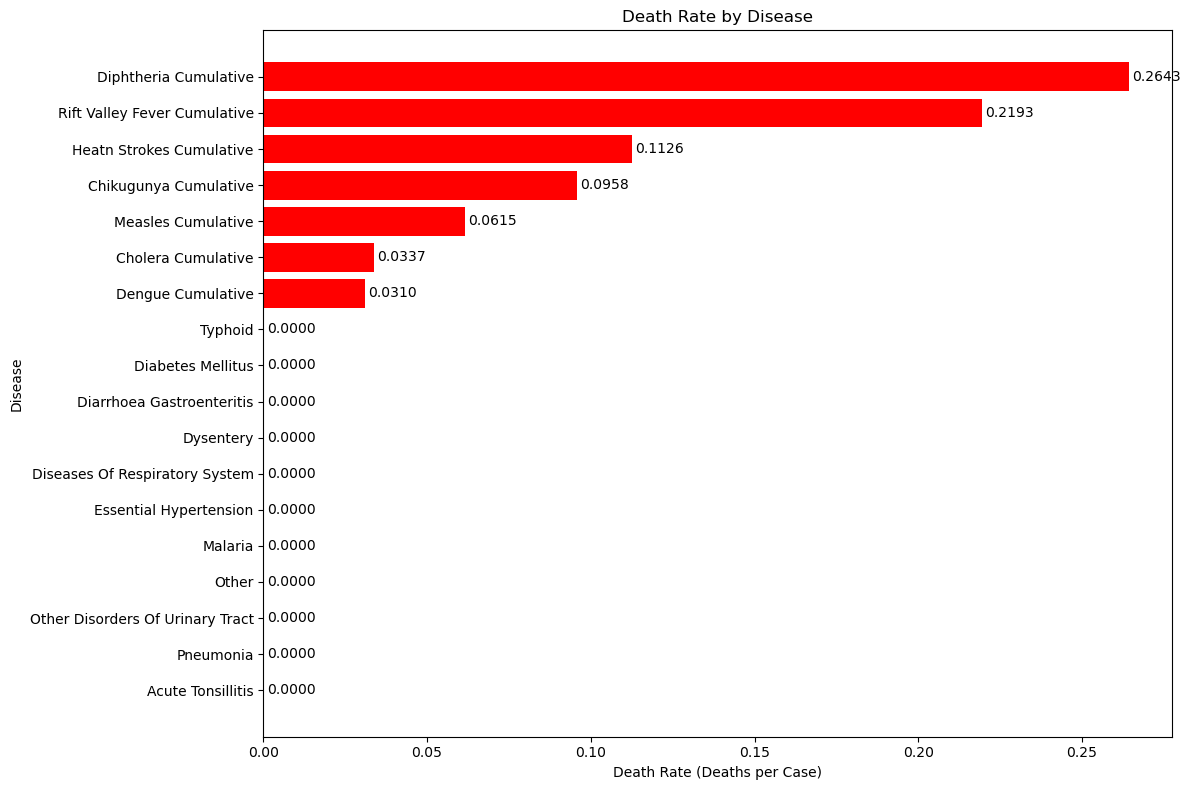

In [145]:
df['death_rate'] = df['deaths'] / df['cases']
death_rate_by_disease = df.groupby('disease')['death_rate'].mean().reset_index()
death_rate_sorted = death_rate_by_disease.sort_values(by='death_rate', ascending=True)

plt.figure(figsize=(12, 8))
bars = plt.barh(death_rate_sorted['disease'], death_rate_sorted['death_rate'], color='red')

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.4f}', va='center', ha='left', color='black')

plt.xlabel('Death Rate (Deaths per Case)')
plt.ylabel('Disease')
plt.title('Death Rate by Disease')
plt.tight_layout()
plt.show()

The one with the highest rate implies the disease has a higher fatality rate compared to others. Compared to others, **Diphtheria**, **Rift Valley Fever** and **Heart Strokes** are highly fatal as per the dataset.

# Analysis based on the states

## Cases By States

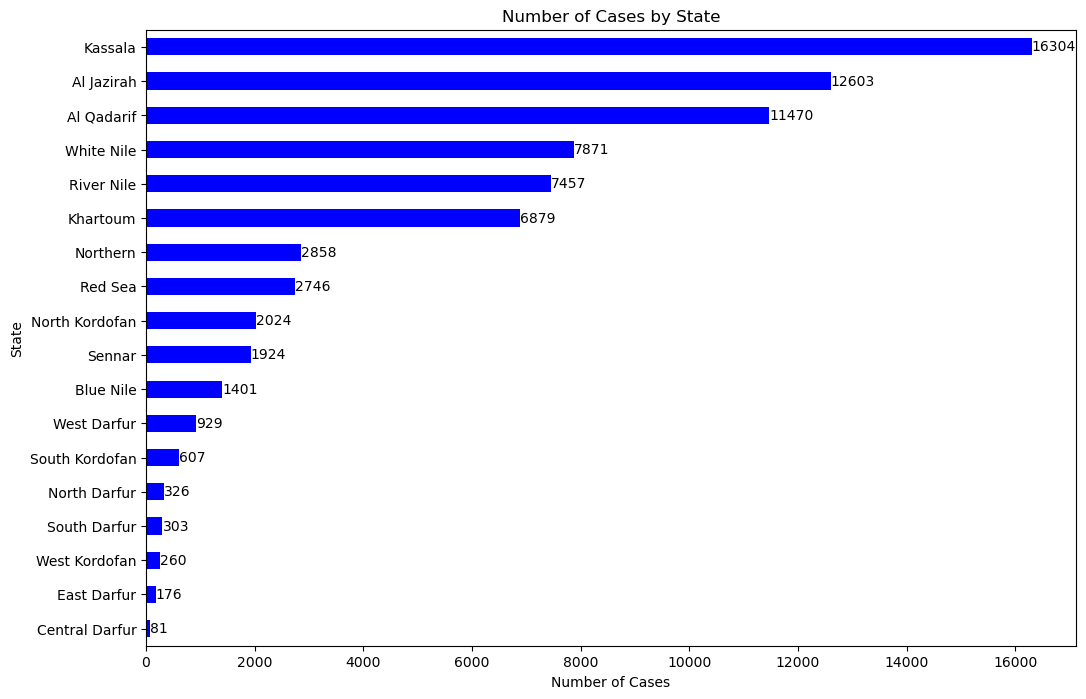

In [172]:
state_cases = df.groupby('state')['cases'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
ax = state_cases.plot(kind='barh', color='blue')
plt.xlabel('Number of Cases')
plt.ylabel('State')
plt.title('Number of Cases by State')

for index, value in enumerate(state_cases):
    ax.text(value, index, str(value), va='center', ha='left', color='black')

plt.show()

By this we can observe that, the states like **Kassala**, **Al Jazirah** and **Al Qadarif** has higher number of cases of various diseases.

## Deaths By States

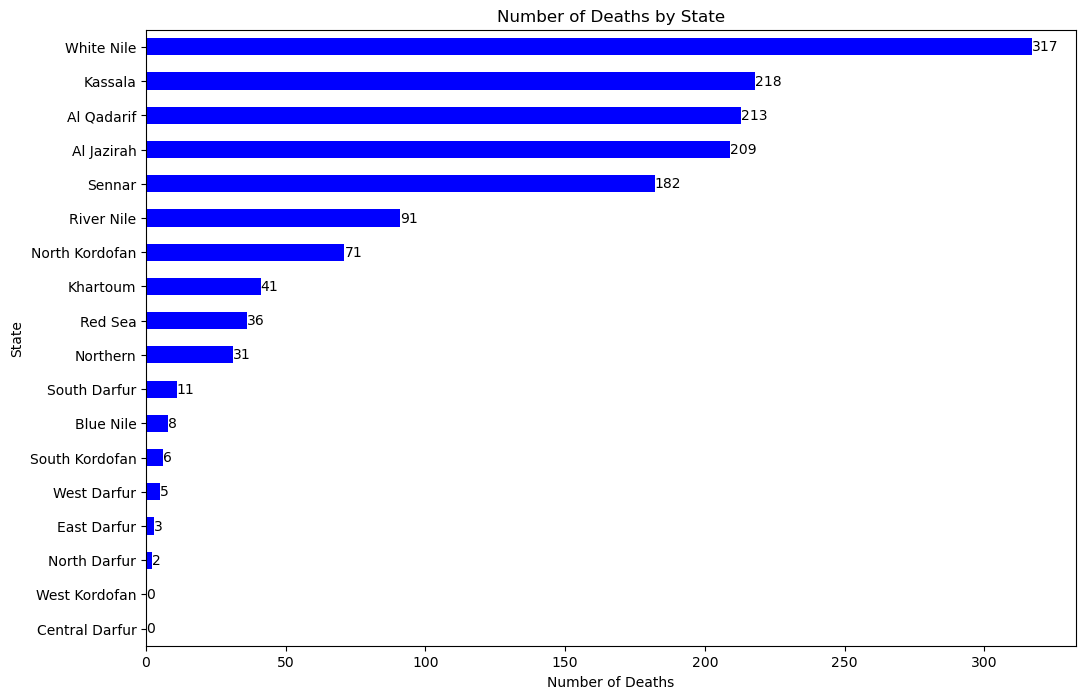

In [177]:
state_deaths = df.groupby('state')['deaths'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
ax = state_deaths.plot(kind='barh', color='blue')
plt.xlabel('Number of Deaths')
plt.ylabel('State')
plt.title('Number of Deaths by State')

for index, value in enumerate(state_deaths):
    ax.text(value, index, str(value), va='center', ha='left', color='black')

plt.show()

Though **White Nile** had relatively lesser cases than other states like **Kassala**, the death numbers are recorded as the highest. This might indicates that the **White Nile** has poor health accessibility. 

## Death Per Cases By States

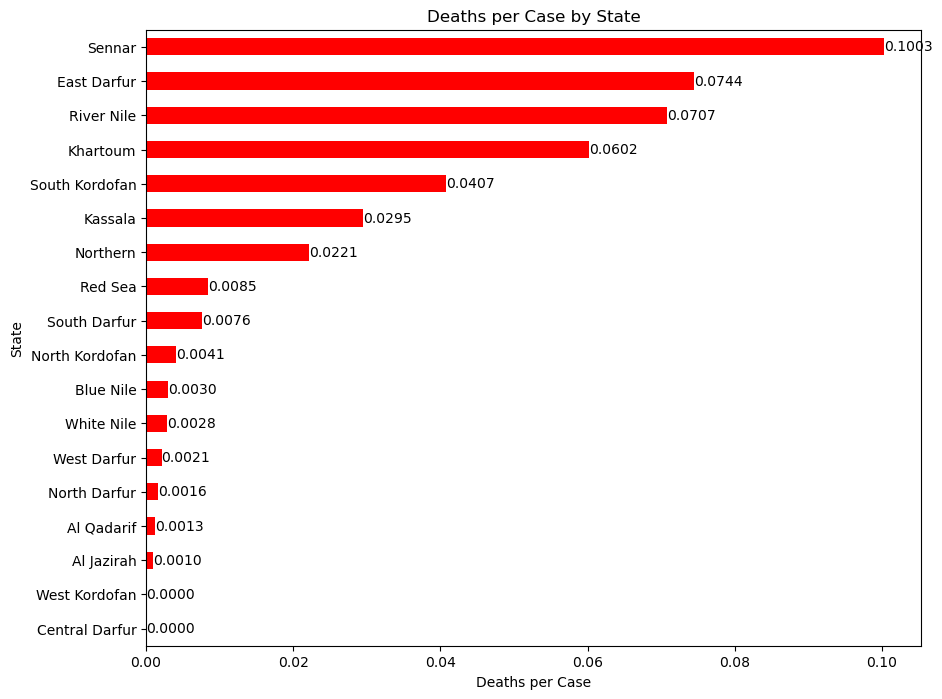

In [186]:
df['deaths_per_case'] = df['deaths'] / df['cases']
state_deaths_per_case = df.groupby('state')['deaths_per_case'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
ax = state_deaths_per_case.plot(kind='barh', color='red')
plt.xlabel('Deaths per Case')
plt.ylabel('State')
plt.title('Deaths per Case by State')

for index, value in enumerate(state_deaths_per_case):
    ax.text(value, index, f'{value:.4f}', va='center', ha='left', color='black')

plt.show()

 The "deaths per case" ratio helps identify states that are more sensitive to deaths relative to the number of cases. A higher ratio might suggest that, even with a similar number of cases, a state is experiencing more deaths, indicating potential issues such as lack of medical resources, insufficient healthcare infrastructure, or the presence of more severe strains of diseases.

However, this does not necessarily indicate the "most fatal" state (in terms of the total number of deaths), but rather highlights states that have a higher risk of death relative to cases.